## Overview of process

High level process:
1. Cleaning Data
2. Split Data - 60 20 20
3. Train model - fit initial model 
4. Validate model - using 5 fold cross validation, select top few models and then tune hyper paramaters
5. Test model - evaluate best models performance ot make sure it is consistent

## You need to add the Survived header to the export to CSV otherwise the length of the csvs will be different


## Clean continous features

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic.isnull().sum()
#177 missing values for age, missing mostly ar random. So replace missing value with average value at the age problem

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

<Figure size 432x288 with 0 Axes>

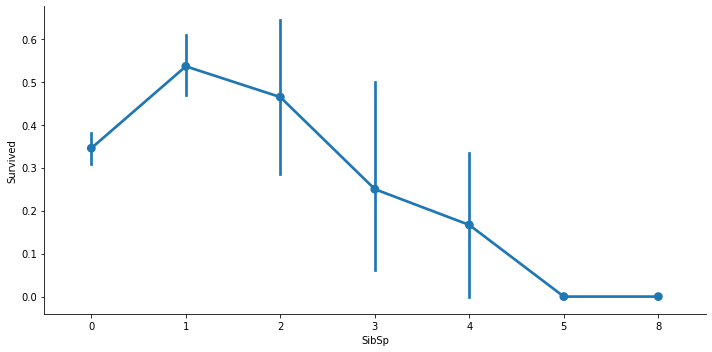

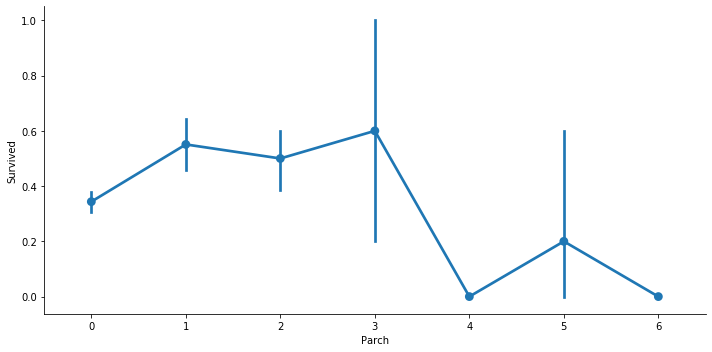

In [5]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x = col, y = 'Survived', data=titanic, kind='point', aspect=2)

In [6]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch'] # cobine two features and then drop them as the value will be covered by familyt count

In [7]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis = 1, inplace=True)
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


In [8]:
#write out cleaned data
titanic.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic_cleaned.csv", index = False)
#make sure pandas doesnt read in titanic index as a feature

## Clean catagorical features

In [9]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1) # create indicator for cabin
gender_num = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_num)
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [10]:
#write out cleaned data
titanic.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\titanic_cleaned.csv", index = False)
#make sure pandas doesnt read in titanic index as a feature

## Split Data into train/ validation/ test set

In [41]:
from sklearn.model_selection import train_test_split
features = titanic.drop('Survived', axis = 1)
labels = titanic['Survived']

,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,3,0,22.000000,7.2500,1,0
1,1,1,38.000000,71.2833,1,1
2,3,1,26.000000,7.9250,0,0
3,1,1,35.000000,53.1000,1,1
4,3,0,35.000000,8.0500,0,0
...,...,...,...,...,...,...
886,2,0,27.000000,13.0000,0,0
887,1,1,19.000000,30.0000,0,1
888,3,1,29.699118,23.4500,3,0
889,1,0,26.000000,30.0000,0,1


In [29]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42) # so split into test and train

In [30]:
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=42)# split test into validate and test

In [31]:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2)) # remember when splitting the test and val data to make these inputs into the train_test_split

0.6
0.2
0.2


In [32]:
print(len(x_train), len(y_train))

534 534


In [33]:
x_train.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_features.csv", index = False)
x_test.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\test_features.csv", index = False)
x_val.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\val_features.csv", index = False)

y_train.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_labels.csv", index = False)
y_test.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\test_labels.csv", index = False)
y_val.to_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\val_labels.csv", index = False)

## Fit basic model using cross validation

In [34]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings


In [42]:
warnings.filterwarnings("ignore", category = FutureWarning)
tr_features = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_features.csv")
tr_labels = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_labels.csv")

In [45]:
tr_labels # had to add survived to he excel as a title, as for some reason it didnt work when seperating it

,Survived
0,1
1,0
2,1
3,0
4,1
...,...
529,1
530,0
531,0
532,1


In [48]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv = 5)

In [49]:
scores # average is around 82% but depending on the subset it could be as high as 86% or as low as 78% - no idea on range or fitting

array([0.83333333, 0.85046729, 0.78504673, 0.78301887, 0.79245283])

# Tune hyperparamter

In [76]:
#Now we are going to use grid search to tune the hyperparamters i.e. find optimal performance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score
tr_features = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_features.csv")
tr_labels = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\train_labels.csv")

In [77]:
def print_results(results):
    print("Best results {}\n".format(results.best_params_))
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params, in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{} for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [78]:
rf = RandomForestClassifier() # collection of decision trees and the combined all results into one
parameters = {
    'n_estimators': [5, 50, 100], # number of decision trees
    'max_depth': [2, 10, 20, None] # max number of layers None meansgo as deep as you want
}

cv = GridSearchCV(rf, parameters, cv = 5) #model training 
cv.fit(tr_features, tr_labels.values.ravel()) # ravel means array

print_results(cv) #going to take each paramter estimation and print results for each models for each hyperparameter combination

Best results {'max_depth': 10, 'n_estimators': 50}

0.794 (+/-0.142 for {'max_depth': 2, 'n_estimators': 5}
0.809 (+/-0.109 for {'max_depth': 2, 'n_estimators': 50}
0.801 (+/-0.122 for {'max_depth': 2, 'n_estimators': 100}
0.794 (+/-0.078 for {'max_depth': 10, 'n_estimators': 5}
0.831 (+/-0.042 for {'max_depth': 10, 'n_estimators': 50}
0.83 (+/-0.053 for {'max_depth': 10, 'n_estimators': 100}
0.794 (+/-0.058 for {'max_depth': 20, 'n_estimators': 5}
0.816 (+/-0.037 for {'max_depth': 20, 'n_estimators': 50}
0.813 (+/-0.034 for {'max_depth': 20, 'n_estimators': 100}
0.801 (+/-0.052 for {'max_depth': None, 'n_estimators': 5}
0.813 (+/-0.027 for {'max_depth': None, 'n_estimators': 50}
0.807 (+/-0.02 for {'max_depth': None, 'n_estimators': 100}


C:\Users\mmje5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [79]:
# so best results were provided by lower hyper parameter values so does this mean the highe rvalues lead to over fitting - not enough evidence to say that

## Evaluate results on the validation set

In [80]:
# so now we will take the 3 best models from the last lesson and validate them
#first we refit the data as initally we used 80% of the data so we need to retrain using all of it
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [81]:
val_features = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\val_features.csv")
val_labels = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\val_labels.csv")

In [82]:

#evaluate models on valiation set
for mdl in [rf1, rf2, rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred),3)
    precision = round(precision_score(val_labels, y_pred),3)
    recall = round(recall_score(val_labels, y_pred),3)
    
    print("Max depth {}/ #of EST: {} -- A {} / P: {}, R: {}".format(mdl.max_depth, mdl.n_estimators, accuracy, precision, recall))

Max depth 10/ #of EST: 5 -- A 0.816 / P: 0.795, R: 0.763
Max depth 10/ #of EST: 50 -- A 0.832 / P: 0.859, R: 0.724
Max depth None/ #of EST: 50 -- A 0.81 / P: 0.809, R: 0.724


In [83]:
#so gain in precision is so large it outweights recall for second model

## Final model selection and validation with test set

In [85]:
te_features = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\test_features.csv")
te_labels = pd.read_csv(r"C:\Users\mmje5\Desktop\Coding Self Taught\Applied Machine Learning - Foundations\Ex_Files_Applied_Machine_Learning\Exercise Files\test_labels.csv")
#so validation set was already used to test model but it was taken from randomly distributed data from dataset? but we need to use test set to see if validation results are matched
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels, y_pred),3)
precision = round(precision_score(te_labels, y_pred),3)
recall = round(recall_score(te_labels, y_pred),3)

print("Max depth {}/ #of EST: {} -- A {} / P: {}, R: {}".format(rf2.max_depth, rf2.n_estimators, accuracy, precision, recall))

Max depth 10/ #of EST: 50 -- A 0.781 / P: 0.724, R: 0.646


In [86]:
# so you get different results than the course because of randonly selecting data and then the randomness in the model